In [2]:
# Charger les données
import pandas as pd

data = pd.read_csv('heart.csv')
print(data.head())
#print(data.describe())

    age  sex  chest pain type  resting blood pressure  \
0  70.0  1.0              4.0                   130.0   
1  67.0  0.0              3.0                   115.0   
2  57.0  1.0              2.0                   124.0   
3  64.0  1.0              4.0                   128.0   
4  74.0  0.0              2.0                   120.0   

   serum cholestoral in mg/dl  fasting blood sugar   \
0                       322.0                   0.0   
1                       564.0                   0.0   
2                       261.0                   0.0   
3                       263.0                   0.0   
4                       269.0                   0.0   

   resting electrocardiographic results  maximum heart rate achieved  \
0                                   2.0                        109.0   
1                                   2.0                        160.0   
2                                   0.0                        141.0   
3                                   0.

In [26]:
# Regarder les données manquantes

data.columns = ['age', 'sex', 'chest pain type', 'resting blood pressure','serum cholestoral','fasting blood sugar','resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'oldpeak', 'the slope of the peak exercise ST segment', 'number of major vessels (0-3) colored by flourosopy', 'thal fixed reversable defect', 'Variable to be predicted']
data.isnull().sum()

age                                                    0
sex                                                    0
chest pain type                                        0
resting blood pressure                                 0
serum cholestoral                                      0
fasting blood sugar                                    0
resting electrocardiographic results                   0
maximum heart rate achieved                            0
exercise induced angina                                0
oldpeak                                                0
the slope of the peak exercise ST segment              0
number of major vessels (0-3) colored by flourosopy    0
thal fixed reversable defect                           0
Variable to be predicted                               0
dtype: int64

1    150
2    120
Name: Variable to be predicted, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Variable to be predicted'>

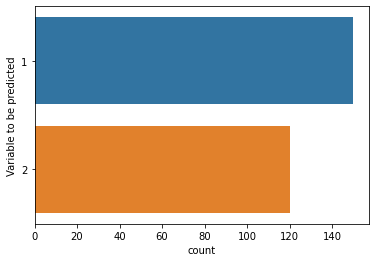

In [27]:
# Répartition graphique des réponses
import seaborn as sns

print(data['Variable to be predicted'].value_counts())
sns.countplot(y="Variable to be predicted", data=data)

<AxesSubplot:xlabel='Variable to be predicted', ylabel='age'>

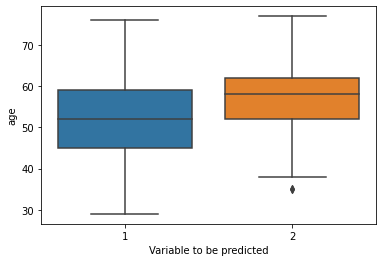

In [28]:
# Répartition graphique des exemples sur une variable spécifique

sns.boxplot(x=data['Variable to be predicted'],y=data['age'],data=data)

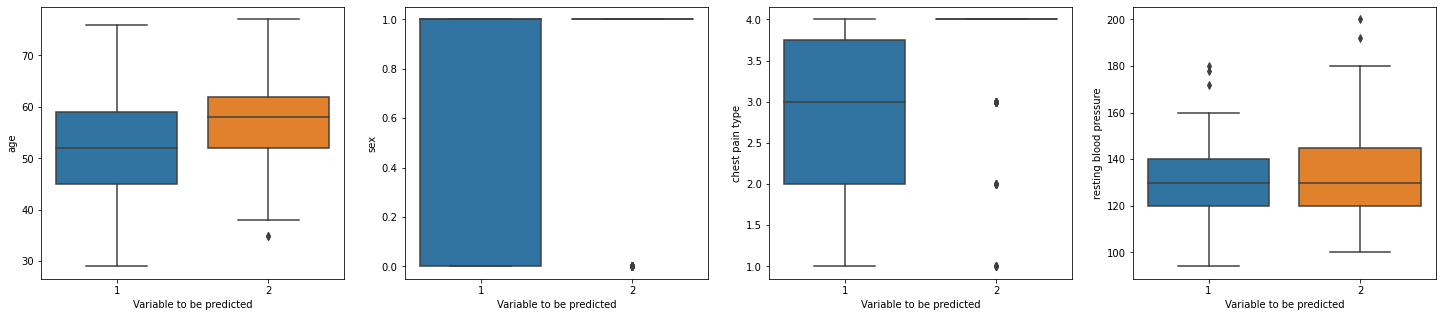

In [29]:
# Répartition graphique des exemples sur un tableau récapitulatif des 4 premières variables
import matplotlib.pyplot as plt

plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='Variable to be predicted',y='age',data=data)
plt.subplot(1,4,2)
sns.boxplot(x='Variable to be predicted',y='sex',data=data)
plt.subplot(1,4,3)
sns.boxplot(x='Variable to be predicted',y='chest pain type',data=data)
plt.subplot(1,4,4)
sns.boxplot(x='Variable to be predicted',y='resting blood pressure',data=data);

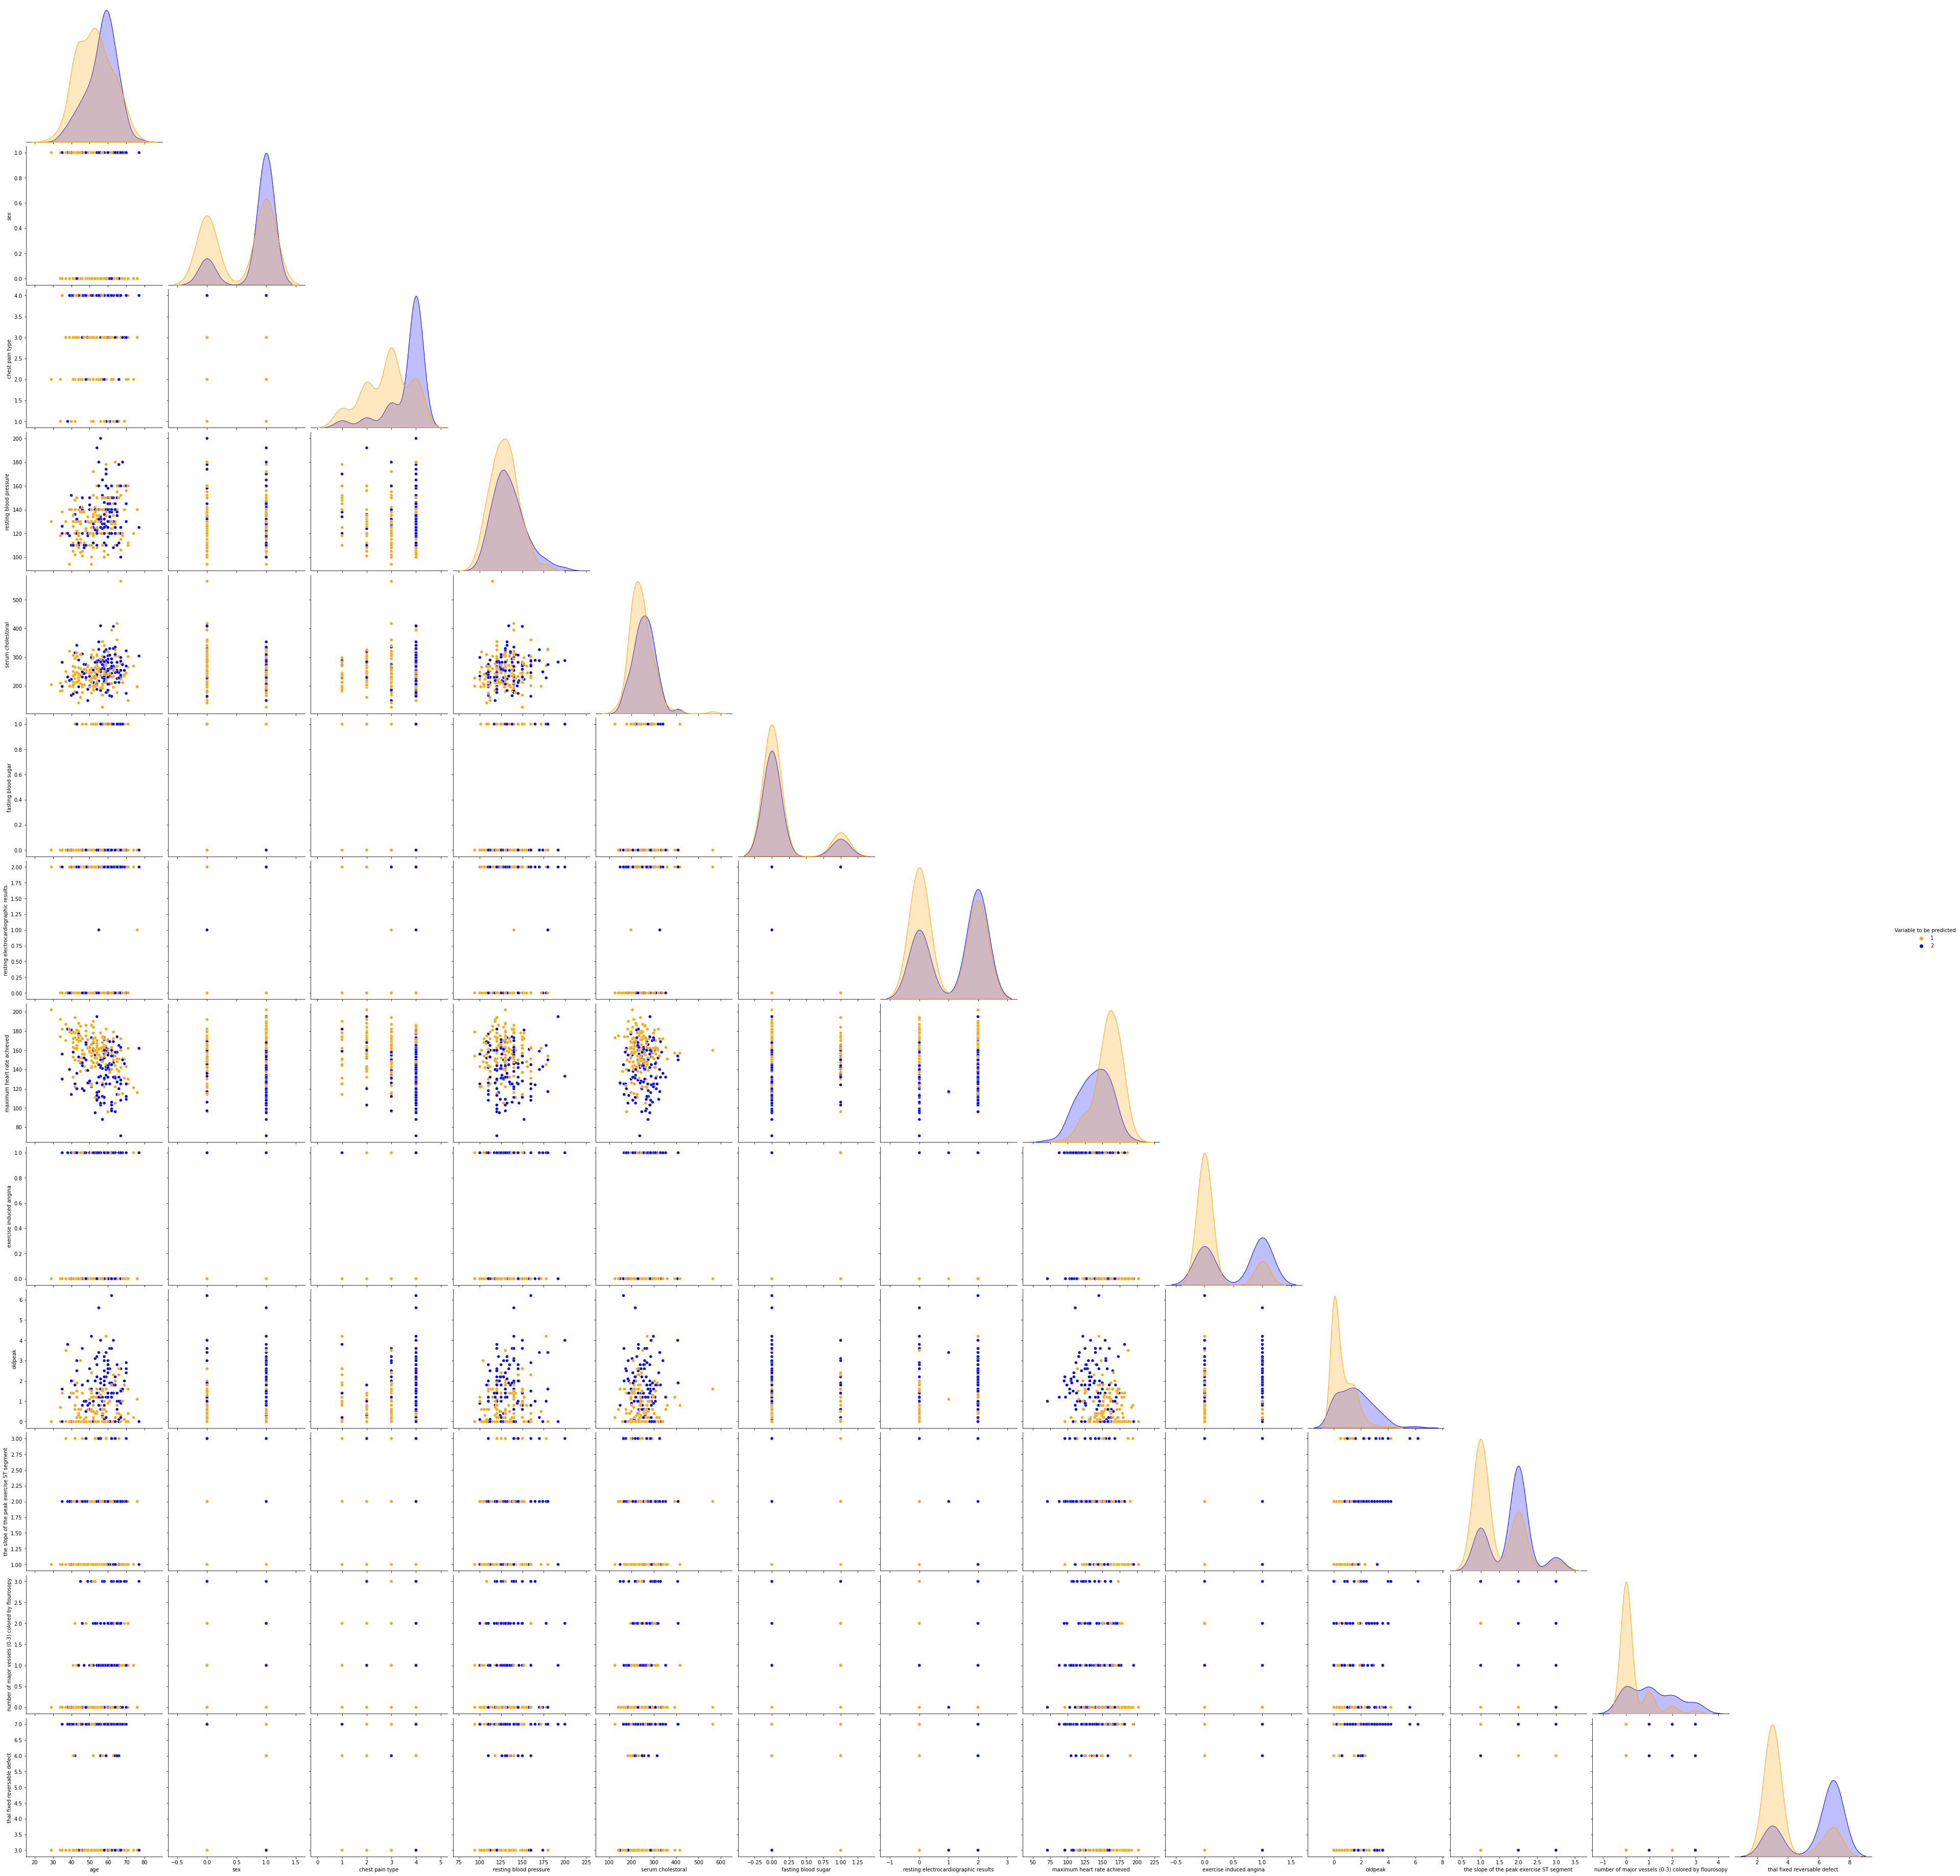

In [30]:
# Répartition graphique des exemples en fonction de toutes les combinaisons de variables 2 à 2
sns.pairplot(data, hue='Variable to be predicted', corner = True, palette = ['orange', 'blue'], height=4)

<AxesSubplot:>

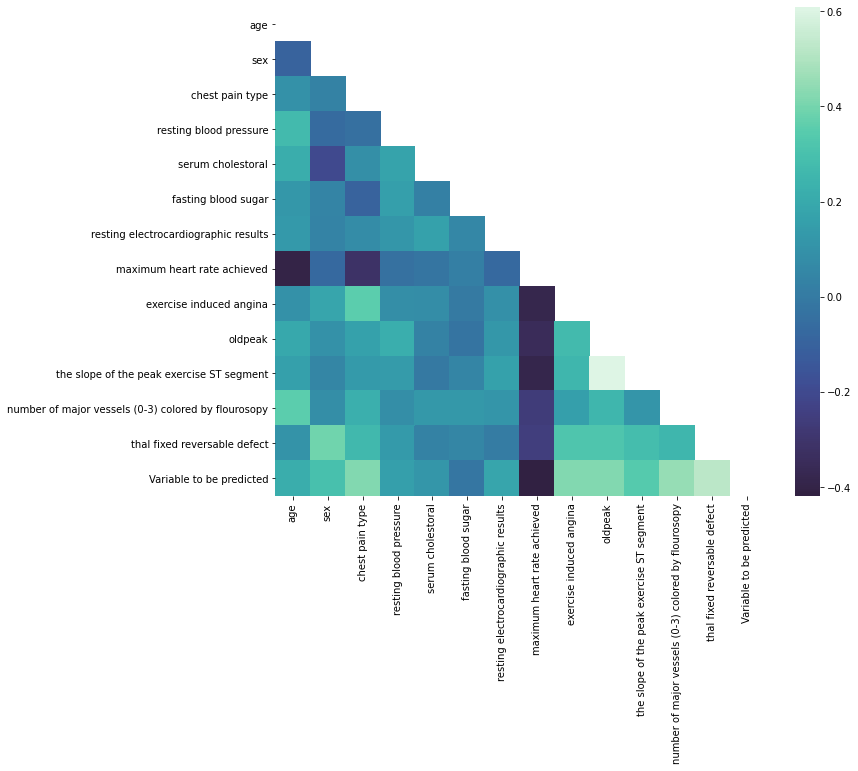

In [31]:
# Matrice de corrélations
data_corr = data.corr()

# masque triangulaire
import numpy as np
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# matplolib setup
f, ax = plt.subplots(figsize=(11, 9))

# matrice de corrélationa vec masque trinagulaire inférieur
sns.heatmap(data_corr, mask=mask, cmap = 'mako', center=0, square=True)

In [32]:
# On separe le jeu de donnée en 2 sous-jeu de donnée X et Y
from sklearn import preprocessing

X = data.iloc[:,:13]
y = data.iloc[:,13:]

In [33]:
# Dans un premier temps, separez (X, Y) en deux ensembles (X_av, y_av) et (X_t, y_t) avec un ratio de 1/2.
from sklearn.model_selection import train_test_split
# pour garder les mêmes données ajouter : train_test_split(..., random_state=1)

X_av,X_t,y_av,y_t = train_test_split(X, y, train_size=0.5,stratify=y, random_state=1) 

**Strategie 1 : ensemble d’apprentissage, de validation et de test.**

In [34]:
p_k = [1, 5, 10, 15, 20, 25]

In [35]:
# S1.1 : Separez l’ensemble (X_av, y_av) en (X a, Y a) et (X_v, y_v) avec un ratio de 2/3.
X_a,X_v,y_a,y_v = train_test_split(X_av,y_av, train_size=0.67,stratify=y_av, random_state=1) 

In [36]:
# S1.2 : Normalisez les jeux de donnees
from sklearn.preprocessing import StandardScaler

model = StandardScaler() 
X_av = model.fit_transform(X_av) 
X_a = model.transform(X_a) 
X_t = model.transform(X_t) 
X_v = model.transform(X_v)

In [37]:
# S1.3 : Appliquez l’algorithme des k plus proches voisins.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

val_score = []
val_score2 = []

for k in p_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_a,y_a.values.ravel())
    
    score1 = accuracy_score(y_a, model.predict(X_a))
    val_score.append(score1)
    
    score2 = accuracy_score(y_v, model.predict(X_v))
    val_score2.append(score2)

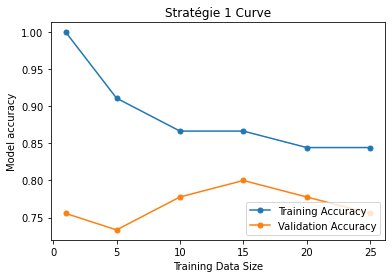

In [38]:
# S1.4 : Tracez sur un meme graphique l’erreur de classification obtenue en apprentissage et en validation

plt.plot(p_k, val_score, marker='o', markersize=5, label='Training Accuracy')
plt.plot(p_k, val_score2, marker='o', markersize=5, label='Validation Accuracy')
plt.title('Stratégie 1 Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [39]:
# S1.5 : Selectionner le meilleur modèle et évaluez l’erreur de test
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_a, y_a.values.ravel())

y_pred = model.predict(X_v)

result = confusion_matrix(y_v, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_v, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_v,y_pred)
print("For n_neighbors = 15, Accuracy:",result2)

Confusion Matrix:
[[22  3]
 [ 6 14]]
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.88      0.83        25
           2       0.82      0.70      0.76        20

    accuracy                           0.80        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.80      0.80      0.80        45

For n_neighbors = 15, Accuracy: 0.8


**Strategie 2 : validation-croisée pour la sélection de k.**

In [40]:
# S1.2 : Normalisez les jeux de données (X_av, y_av) et (X_t, y_t)
from sklearn.preprocessing import StandardScaler

model = StandardScaler() 
model = model.fit(X_av) 
X_av = model.transform(X_av) 
X_t = model.transform(X_t)

In [41]:
# S2.2 : Â partir de (X av, Y av), regardez comment construire K = 5 sous-ensembles au sein de votre classifieur.

cv = 5

In [42]:
# S2.3. Pour chaque valeur de p_k, appliquez l’algorithme de Cross Validation.
from sklearn.model_selection import cross_val_score

val_score = []
val_score2 = []

for k in p_k:
    score = cross_val_score(KNeighborsClassifier(k), X_av, y_av.values.ravel(), cv=cv, scoring='accuracy').mean()
    score2 = cross_val_score(KNeighborsClassifier(k), X_t, y_t.values.ravel(), cv=cv, scoring='accuracy').mean()
    val_score.append(score)
    val_score2.append(score2)

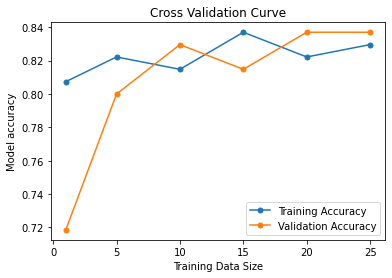

In [43]:
# S2.4 : Tracez sur un meme graphique l’erreur de classification moyenne obtenue en apprentissage et en validation en fonction de p_k 

plt.plot(p_k, val_score, marker='o', markersize=5, label='Training Accuracy')
plt.plot(p_k, val_score2, marker='o', markersize=5, label='Validation Accuracy')
plt.title('Cross Validation Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [44]:
# S2.5 : Determinez le meilleur modèle et évaluez l’erreur de test.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_av, y_av.values.ravel())

y_pred = model.predict(X_t)

result = confusion_matrix(y_t, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_t, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_t,y_pred)
print("For n_neighbors = 20, Accuracy:",result2)

Confusion Matrix:
[[69  6]
 [15 45]]
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        75
           2       0.88      0.75      0.81        60

    accuracy                           0.84       135
   macro avg       0.85      0.83      0.84       135
weighted avg       0.85      0.84      0.84       135

For n_neighbors = 20, Accuracy: 0.8444444444444444
